In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Forecasting with Holt Winters method

## Read the relevant file and parse the dates as required

In [2]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

## Change the frequency accordingly from the Offset Aliases

In [4]:
df.index.freq='MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

## Apply the necessary splitting depending on the size of our data

In [5]:
len(df.index)

144

In [6]:
train_set = df.iloc[:108] # All data up to but not including the 108th row
test_set = df.iloc[108:]

## Fit our training set with Holt Winters (TSE) fit of multiplicative trend and seasonality components

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_set['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
FitModel = model.fit()

## Test set

In [8]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
len(test_set)

36

In [10]:
test_predictions = FitModel.forecast(len(test_set))
test_predictions

1958-01-01    348.204345
1958-02-01    341.572414
1958-03-01    397.790545
1958-04-01    388.670276
1958-05-01    391.783211
1958-06-01    451.357130
1958-07-01    502.150898
1958-08-01    498.397108
1958-09-01    439.422205
1958-10-01    383.519673
1958-11-01    336.907955
1958-12-01    381.282700
1959-01-01    392.159299
1959-02-01    384.690199
1959-03-01    448.004925
1959-04-01    437.733375
1959-05-01    441.239265
1959-06-01    508.333392
1959-07-01    565.539021
1959-08-01    561.311377
1959-09-01    494.891883
1959-10-01    431.932594
1959-11-01    379.436929
1959-12-01    429.413242
1960-01-01    441.662829
1960-02-01    433.250879
1960-03-01    504.558027
1960-04-01    492.989867
1960-05-01    496.938317
1960-06-01    572.501951
1960-07-01    636.928830
1960-08-01    632.167518
1960-09-01    557.363676
1960-10-01    486.456835
1960-11-01    427.334473
1960-12-01    483.619456
Freq: MS, dtype: float64

In [11]:
test_predictions.rename('HoltWinters')

1958-01-01    348.204345
1958-02-01    341.572414
1958-03-01    397.790545
1958-04-01    388.670276
1958-05-01    391.783211
1958-06-01    451.357130
1958-07-01    502.150898
1958-08-01    498.397108
1958-09-01    439.422205
1958-10-01    383.519673
1958-11-01    336.907955
1958-12-01    381.282700
1959-01-01    392.159299
1959-02-01    384.690199
1959-03-01    448.004925
1959-04-01    437.733375
1959-05-01    441.239265
1959-06-01    508.333392
1959-07-01    565.539021
1959-08-01    561.311377
1959-09-01    494.891883
1959-10-01    431.932594
1959-11-01    379.436929
1959-12-01    429.413242
1960-01-01    441.662829
1960-02-01    433.250879
1960-03-01    504.558027
1960-04-01    492.989867
1960-05-01    496.938317
1960-06-01    572.501951
1960-07-01    636.928830
1960-08-01    632.167518
1960-09-01    557.363676
1960-10-01    486.456835
1960-11-01    427.334473
1960-12-01    483.619456
Freq: MS, Name: HoltWinters, dtype: float64

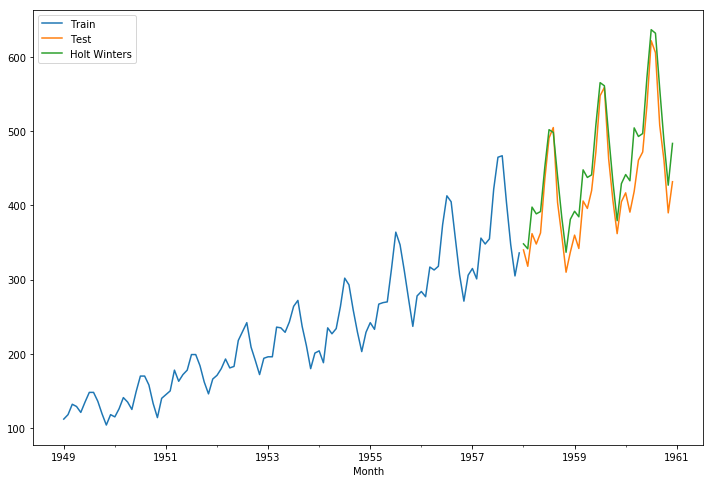

In [12]:
train_set['Thousands of Passengers'].plot(figsize=(12,8),legend=True,label='Train')
test_set['Thousands of Passengers'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='Holt Winters')

## Inspect closer the test set predictions

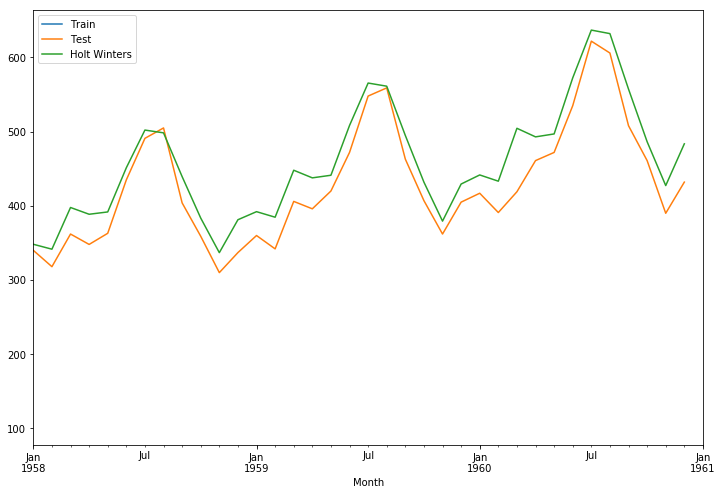

In [13]:
train_set['Thousands of Passengers'].plot(figsize=(12,8),legend=True,label='Train')
test_set['Thousands of Passengers'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='Holt Winters',xlim=['1958-01-01','1961-01-01'])

# Evaluating Forecast Predictions

## Calculate the MAE,MSE, RMSE of the above prediction

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [15]:
print('The mean absolute error between our Holt Winters prediction and the test set is:')
print(mean_absolute_error(test_predictions,test_set))
print('The mean squared error between our Holt Winters prediction and the test set is:')
print(mean_squared_error(test_predictions,test_set))

The mean absolute error between our Holt Winters prediction and the test set is:
30.24228895401259
The mean squared error between our Holt Winters prediction and the test set is:
1143.4649378653387


### RMSE

In [16]:
print('The root mean squared error between our Holt Winters prediction and the test set is:')
print(np.sqrt(mean_squared_error(test_predictions,test_set)))

The root mean squared error between our Holt Winters prediction and the test set is:
33.815158403670665


## Compare the MAE,MSE and RMSE to the test data characteristics

In [17]:
test_set.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


# Forecasting in the FUTURE with Holt Winters

## We first have to retrain our model using both train and test sets

In [18]:
model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
FitModel = model.fit()

## Forecast 3 years ahead of the end of our df (i.e. ahead of end of test set). NB your future horizon has to be less or equal to the length of your test set. Since our test set is 36 months then the maximum forecast period of the future is 36 months (3 years)

In [19]:
future_predictions = FitModel.forecast(36)
future_predictions = future_predictions.rename('Future Holt Winters')
future_predictions

1961-01-01    450.696219
1961-02-01    424.853976
1961-03-01    475.608791
1961-04-01    504.080734
1961-05-01    517.915698
1961-06-01    590.236094
1961-07-01    684.291449
1961-08-01    678.113089
1961-09-01    567.149020
1961-10-01    507.822588
1961-11-01    434.746577
1961-12-01    485.997796
1962-01-01    502.787057
1962-02-01    473.958004
1962-03-01    530.578989
1962-04-01    562.341679
1962-05-01    577.775669
1962-06-01    658.454755
1962-07-01    763.380896
1962-08-01    756.488451
1962-09-01    632.699310
1962-10-01    566.516012
1962-11-01    484.993978
1962-12-01    542.168741
1963-01-01    560.898481
1963-02-01    528.737406
1963-03-01    591.902566
1963-04-01    627.336343
1963-05-01    644.554172
1963-06-01    734.558034
1963-07-01    851.611392
1963-08-01    843.922327
1963-09-01    705.825811
1963-10-01    631.993140
1963-11-01    541.048903
1963-12-01    604.831845
Freq: MS, Name: Future Holt Winters, dtype: float64

## Plot the df and its future prediction

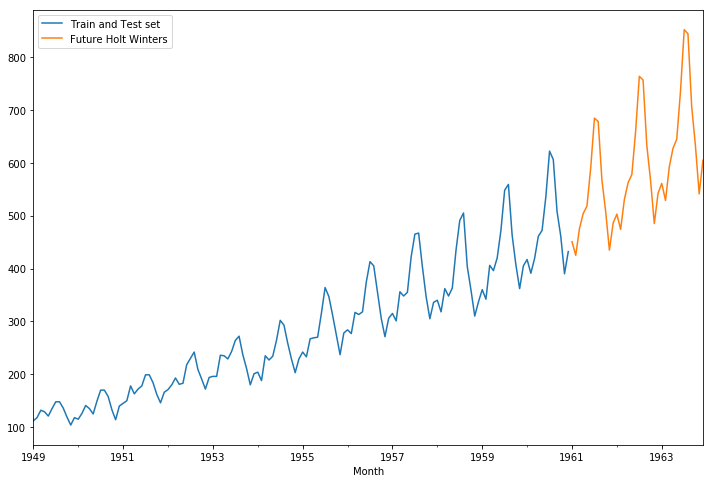

In [20]:
df['Thousands of Passengers'].plot(figsize=(12,8),legend=True,label='Train and Test set').autoscale(axis='x',tight=True)
future_predictions.plot(legend=True)

# Stationarity

In [21]:
df = pd.read_csv('samples.csv',index_col=0,parse_dates=True)
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


## Start with column (a)

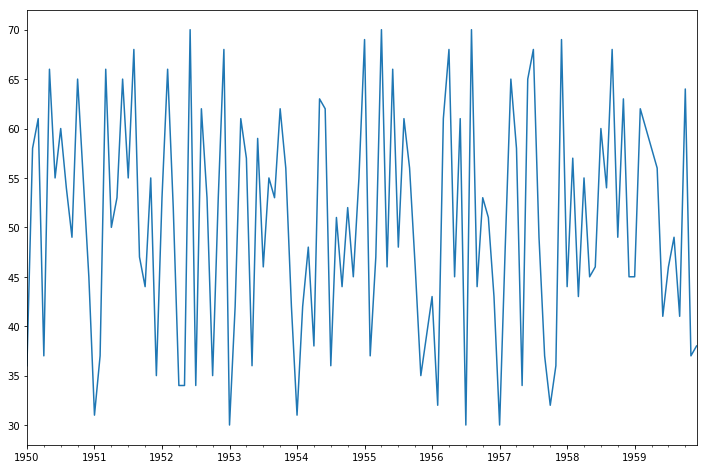

In [22]:
df['a'].plot(figsize=(12,8)).autoscale(axis='x',tight=True)

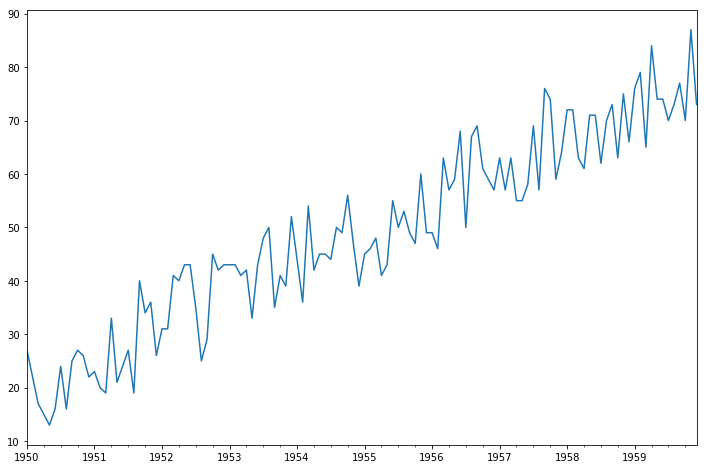

In [23]:
df['b'].plot(figsize=(12,8)).autoscale(axis='x',tight=True)

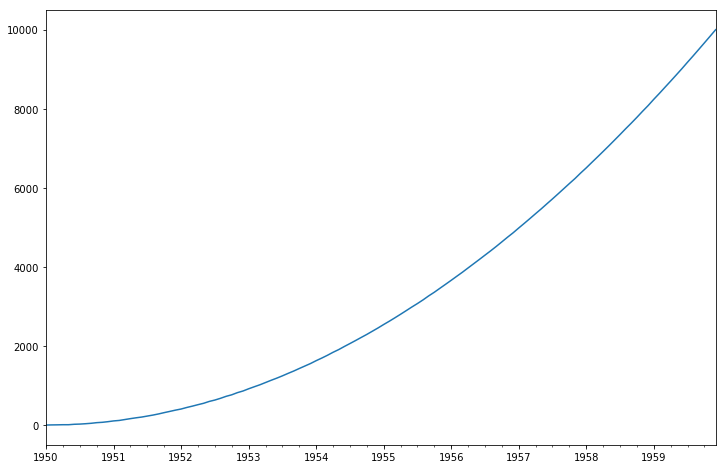

In [24]:
df['c'].plot(figsize=(12,8)).autoscale(axis='x',tight=True)

# First order differencing (MANUAL and BUILTIN)

In [25]:
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


## Apply 1st order diff manually on column b

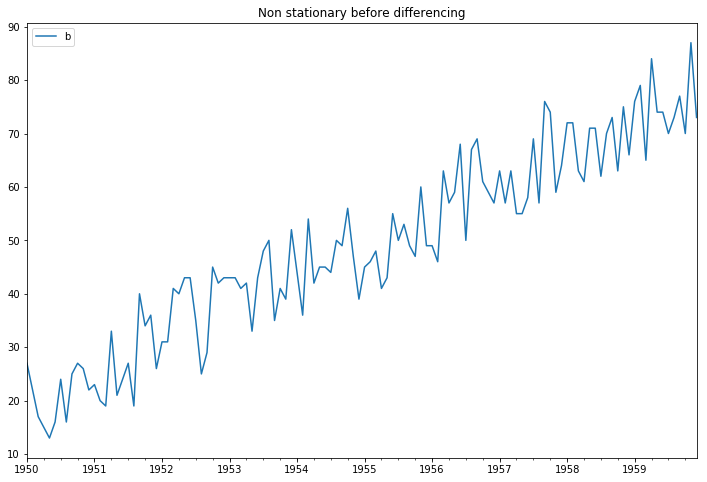

In [26]:
df['b'].plot(figsize=(12,8),legend=True,title='Non stationary before differencing').autoscale(axis='x',tight=True)

In [27]:
df['ManualDiff1']=df['b']-df['b'].shift(1)
df.head()

,a,b,c,d,ManualDiff1
1950-01-01,36,27,0,67,NaN
1950-02-01,58,22,3,31,-5.0
1950-03-01,61,17,5,67,-5.0
1950-04-01,37,15,8,47,-2.0
1950-05-01,66,13,8,62,-2.0


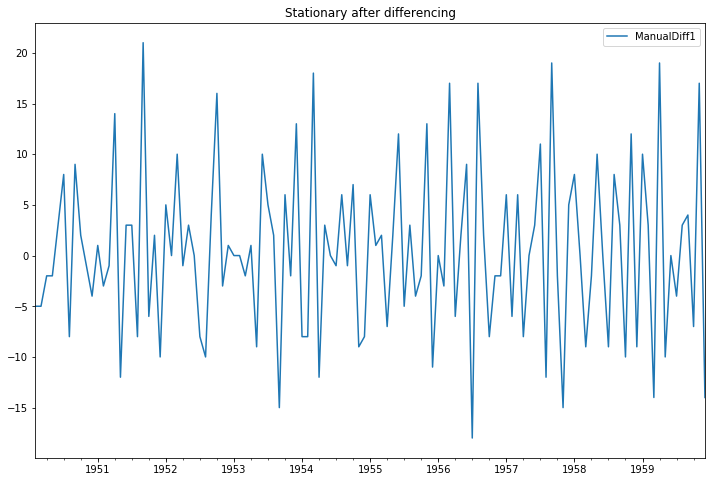

In [28]:
df['ManualDiff1'].plot(figsize=(12,8),legend=True,title='Stationary after differencing').autoscale(axis='x',tight=True)

## Apply 1st order diff automatically with built in function in pandas (.diff)

In [29]:
df['BuiltinDiff1']=df['b'].diff(periods=1)
df.tail()

,a,b,c,d,ManualDiff1,BuiltinDiff1
1959-08-01,49,73,9338,58,3.0,3.0
1959-09-01,41,77,9502,38,4.0,4.0
1959-10-01,64,70,9667,42,-7.0,-7.0
1959-11-01,37,87,9833,62,17.0,17.0
1959-12-01,38,73,10000,50,-14.0,-14.0


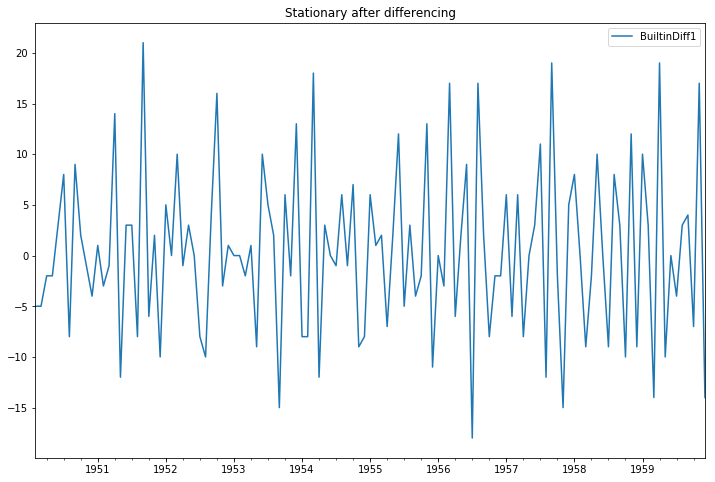

In [30]:
df['BuiltinDiff1'].plot(figsize=(12,8),legend=True,title='Stationary after differencing').autoscale(axis='x',tight=True)

# Forecasting using 1st order differencing

## Apply Holt Winters (TES) on the differenced part 

In [31]:
df.index.freq='MS'
model = ExponentialSmoothing(df['ManualDiff1'].dropna(),trend='add',seasonal='add',seasonal_periods=12)
FitModel=model.fit()
z = pd.DataFrame(data=FitModel.forecast(20))
z.columns = ['PredictedDiff']
z.head()

,PredictedDiff
1960-01-01,3.939662
1960-02-01,-2.121129
1960-03-01,-0.598664
1960-04-01,-0.002103
1960-05-01,-1.149366


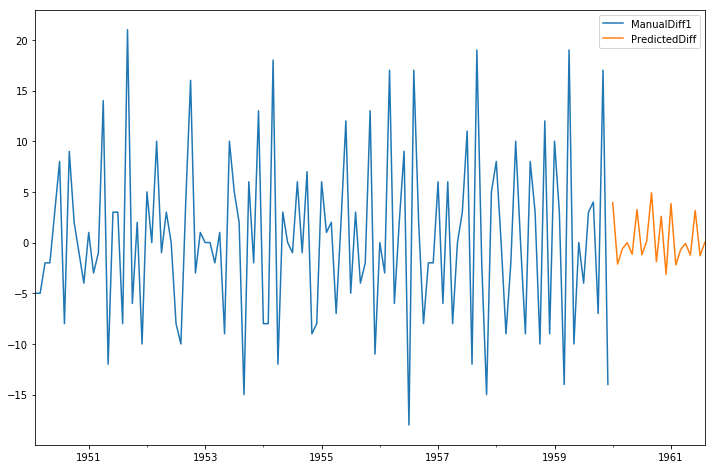

In [32]:
df['ManualDiff1'].plot(figsize=(12,8),legend=True).autoscale(axis='x',tight=True)
z['PredictedDiff'].plot(legend=True)

## Apply cumulative sum to get the actual values forecasted (inverse transformation)

In [33]:
z['FinalForecastedResult'] = df['b'].iloc[-1] + z['PredictedDiff'].cumsum()
z.head()

,PredictedDiff,FinalForecastedResult
1960-01-01,3.939662,76.939662
1960-02-01,-2.121129,74.818532
1960-03-01,-0.598664,74.219869
1960-04-01,-0.002103,74.217766
1960-05-01,-1.149366,73.068400


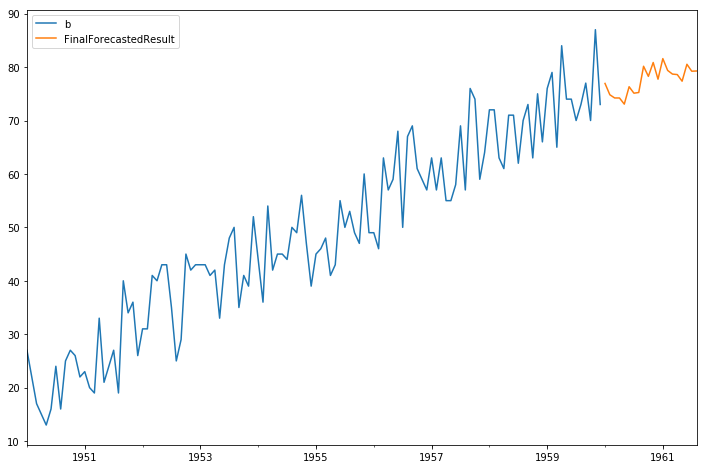

In [34]:
df['b'].plot(figsize=(12,8),legend=True).autoscale(axis='x',tight=True)
z['FinalForecastedResult'].plot(legend=True)

# Second order differencing

## Show why first order differencing is not enough for df['c']

In [35]:
df.head()

,a,b,c,d,ManualDiff1,BuiltinDiff1
1950-01-01,36,27,0,67,NaN,NaN
1950-02-01,58,22,3,31,-5.0,-5.0
1950-03-01,61,17,5,67,-5.0,-5.0
1950-04-01,37,15,8,47,-2.0,-2.0
1950-05-01,66,13,8,62,-2.0,-2.0


In [36]:
df['Diff1c'] = df['c'].diff()
df.head()

,a,b,c,d,ManualDiff1,BuiltinDiff1,Diff1c
1950-01-01,36,27,0,67,NaN,NaN,NaN
1950-02-01,58,22,3,31,-5.0,-5.0,3.0
1950-03-01,61,17,5,67,-5.0,-5.0,2.0
1950-04-01,37,15,8,47,-2.0,-2.0,3.0
1950-05-01,66,13,8,62,-2.0,-2.0,0.0


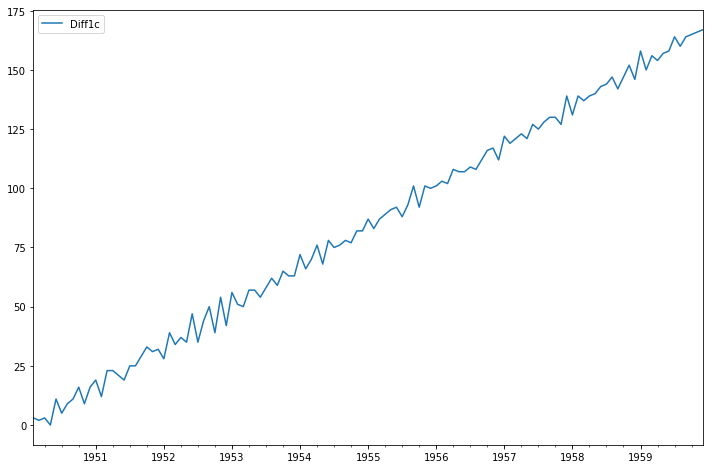

In [37]:
df['Diff1c'].plot(figsize=(12,8),legend=True).autoscale(axis='x',tight=True)

### We can see that this is non stationary even after differencing so we need an additional order

## Apply second order differencing on column c

In [38]:
df.head()

,a,b,c,d,ManualDiff1,BuiltinDiff1,Diff1c
1950-01-01,36,27,0,67,NaN,NaN,NaN
1950-02-01,58,22,3,31,-5.0,-5.0,3.0
1950-03-01,61,17,5,67,-5.0,-5.0,2.0
1950-04-01,37,15,8,47,-2.0,-2.0,3.0
1950-05-01,66,13,8,62,-2.0,-2.0,0.0


In [39]:
df['Diff2c']=df['c'].diff().diff()
df.head()

,a,b,c,d,ManualDiff1,BuiltinDiff1,Diff1c,Diff2c
1950-01-01,36,27,0,67,NaN,NaN,NaN,NaN
1950-02-01,58,22,3,31,-5.0,-5.0,3.0,NaN
1950-03-01,61,17,5,67,-5.0,-5.0,2.0,-1.0
1950-04-01,37,15,8,47,-2.0,-2.0,3.0,1.0
1950-05-01,66,13,8,62,-2.0,-2.0,0.0,-3.0


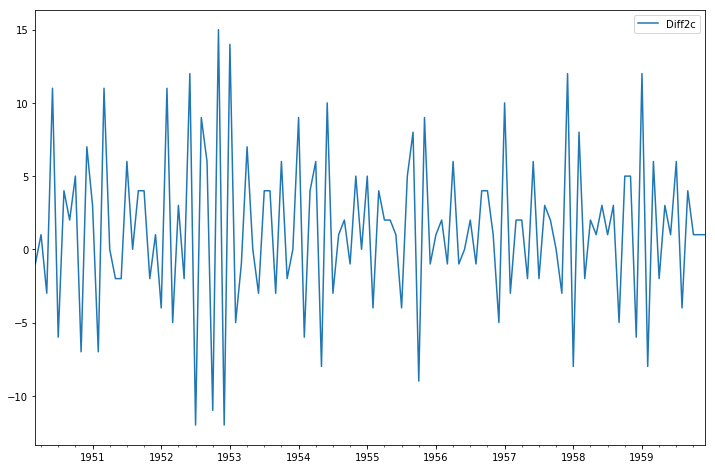

In [40]:
df['Diff2c'].plot(figsize=(12,8),legend=True).autoscale(axis='x',tight=True)

### Now it is stationary

# Forecasting using 2nd order differencing

## Suppose your next 5 forecasted values are [7,-2,5,-1,12] find the final actual magnitude of the forecasted values

### Create a new dataframe of the forecasted values

In [41]:
df.tail()

,a,b,c,d,ManualDiff1,BuiltinDiff1,Diff1c,Diff2c
1959-08-01,49,73,9338,58,3.0,3.0,160.0,-4.0
1959-09-01,41,77,9502,38,4.0,4.0,164.0,4.0
1959-10-01,64,70,9667,42,-7.0,-7.0,165.0,1.0
1959-11-01,37,87,9833,62,17.0,17.0,166.0,1.0
1959-12-01,38,73,10000,50,-14.0,-14.0,167.0,1.0


In [42]:
Forecasted_dates = pd.date_range('1960-01-01',periods=5,freq='MS')

In [43]:
ForecastedDiff = [7,-2,5,-1,12]
ForecastedDf = pd.DataFrame(data=[Forecasted_dates,ForecastedDiff])
ForecastedDf = ForecastedDf.transpose()
ForecastedDf.columns=['Forecasted_dates','ForecastedDiff']
ForecastedDf.set_index('Forecasted_dates',inplace=True)
ForecastedDf.index.freq='MS'
ForecastedDf.head()

,ForecastedDiff
Forecasted_dates,
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


## Apply inverse transformation 

In [44]:
v1 = df['c'].iloc[-2]
v2 = df['c'].iloc[-1]
forecastvals = []

for x in ForecastedDf['ForecastedDiff']:
    forecastvals.append(x + 2*v2 - v1)
    v1=v2
    v2=forecastvals[-1]

ForecastedDf['ForecastedValues'] = forecastvals

In [45]:
ForecastedDf.head()

,ForecastedDiff,ForecastedValues
Forecasted_dates,,
1960-01-01,7,10174
1960-02-01,-2,10346
1960-03-01,5,10523
1960-04-01,-1,10699
1960-05-01,12,10887


## Plot both dataset and forecast

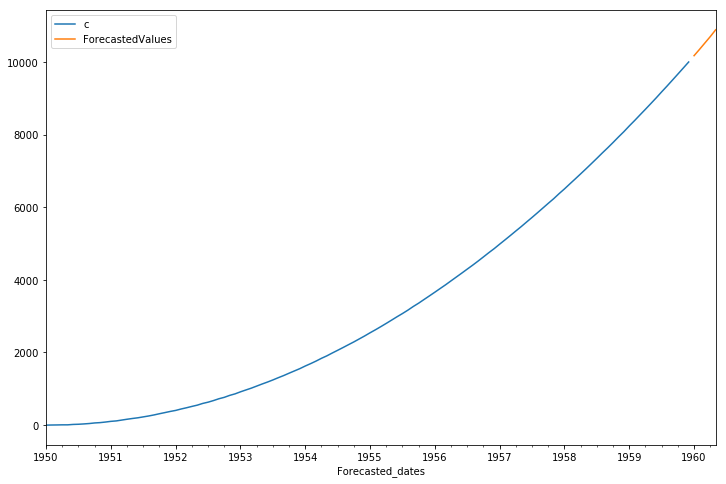

In [46]:
df['c'].plot(figsize=(12,8),legend=True).autoscale(axis='x',tight=True)
ForecastedDf['ForecastedValues'].plot(legend=True)

## Alternative method: Calculate the first differences and then cumulative sum for obtaining the final value. (NB. cumsum() is the exact opposite of .diff() operation). Thus moving from 2nd order to 1st order we require cumsum() whislt for the opposite we require .diff()

In [47]:
# Get our starting point (this is the 1st order difference of y(t-1) and y(t-2))
startingpoint = df['c'].iloc[-1]-df['c'].iloc[-2]

ForecastedDf['Diff1'] = startingpoint + ForecastedDf['ForecastedDiff'].cumsum()
ForecastedDf.head()

,ForecastedDiff,ForecastedValues,Diff1
Forecasted_dates,,,
1960-01-01,7,10174,174
1960-02-01,-2,10346,172
1960-03-01,5,10523,177
1960-04-01,-1,10699,176
1960-05-01,12,10887,188


# We repeat the same process to convert 1st order Diff to y values

In [48]:
startingpoint = df['c'].iloc[-1]

ForecastedDf['ForecastedValues2'] = startingpoint + ForecastedDf['Diff1'].cumsum()
ForecastedDf.head()

,ForecastedDiff,ForecastedValues,Diff1,ForecastedValues2
Forecasted_dates,,,,
1960-01-01,7,10174,174,10174
1960-02-01,-2,10346,172,10346
1960-03-01,5,10523,177,10523
1960-04-01,-1,10699,176,10699
1960-05-01,12,10887,188,10887
